In [1]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import optuna
import lightgbm as lgbm
from functools import partial

In [2]:
sample = pd.read_csv('../input/tabular-playground-series-apr-2022/sample_submission.csv')
y = pd.read_csv('../input/tabular-playground-series-apr-2022/train_labels.csv').iloc[:, -1].values

In [3]:
valids = pd.read_csv('../input/tps-04-submission/valids_7models.csv').values
tests = pd.read_csv('../input/tps-04-submission/tests_7models.csv').values

new_valid = pd.read_csv('../input/fork-of-fork-of-fork-of-tps-04-fe-03/valid_preds_array.csv').values
new_test = pd.read_csv('../input/fork-of-fork-of-fork-of-tps-04-fe-03/test_preds_array.csv').values

new_valid_1 = pd.read_csv('../input/tps-04-fe-05-gru/valid_preds_array.csv').values
new_test_1 = pd.read_csv('../input/tps-04-fe-05-gru/test_preds_array.csv').values

new_valid_2 = pd.read_csv('../input/tps-04-fe-06-gru/valid_preds_array.csv').values
new_test_2 = pd.read_csv('../input/tps-04-fe-06-gru/test_preds_array.csv').values

new_valid_3 = pd.read_csv('../input/tps-04-fe-05-cnn/valid_preds_array.csv').values
new_test_3 = pd.read_csv('../input/tps-04-fe-05-cnn/test_preds_array.csv').values

new_valid_4 = pd.read_csv('../input/tps-04-fe-06-gru-lstm-no-fe/valid_preds_array.csv').values
new_test_4 = pd.read_csv('../input/tps-04-fe-06-gru-lstm-no-fe/test_preds_array.csv').values

new_valid_5 = pd.read_csv('../input/tps-04-fe-06-gru-no-fe/valid_preds_array.csv').values
new_test_5 = pd.read_csv('../input/tps-04-fe-06-gru-no-fe/test_preds_array.csv').values

new_valid_6 = pd.read_csv('../input/tps-04-fe-05-gru-gbm-model/gbm_valid_preds_array.csv').values
new_test_6 = pd.read_csv('../input/tps-04-fe-05-gru-gbm-model/gbm_test_preds_array.csv').values

new_valid_7 = pd.read_csv('../input/tps04-97-and-more/valid_preds_array_2.csv').values
new_test_7 = pd.read_csv('../input/tps04-97-and-more/test_preds_array_2.csv').values

new_valid_8 = pd.read_csv('../input/tps04-cnn-gru-05-fe/valid_preds_array.csv').values
new_test_8 = pd.read_csv('../input/tps04-cnn-gru-05-fe/test_preds_array.csv').values

new_valid_9 = pd.read_csv('../input/tps04-cnn-lstm-05-fe/valid_preds_array.csv').values
new_test_9 = pd.read_csv('../input/tps04-cnn-lstm-05-fe/test_preds_array.csv').values

new_valid_10 = pd.read_csv('../input/tps04-cnn-gru-05-fe-02/valid_preds_array.csv').values
new_test_10 = pd.read_csv('../input/tps04-cnn-gru-05-fe-02/test_preds_array.csv').values

new_valid_11 = pd.read_csv('../input/tps04-cnn-lstm-03-fe/valid_preds_array.csv').values
new_test_11 = pd.read_csv('../input/tps04-cnn-lstm-03-fe/test_preds_array.csv').values

new_valid_12 = pd.read_csv('../input/tps04-cnn-lstm-03-fe-after/valid_preds_array.csv').values
new_test_12 = pd.read_csv('../input/tps04-cnn-lstm-03-fe-after/test_preds_array.csv').values

new_valid_13 = pd.read_csv('../input/tps04-cnn-lstm-mha-03-fe/valid_preds_array.csv').values
new_test_13 = pd.read_csv('../input/tps04-cnn-lstm-mha-03-fe/test_preds_array.csv').values

new_valid_14 = pd.read_csv('../input/tps04-cnn-lstm-mha-03-fe-after/valid_preds_array.csv').values
new_test_14 = pd.read_csv('../input/tps04-cnn-lstm-mha-03-fe-after/test_preds_array.csv').values

new_valid_15 = pd.read_csv('../input/fork-of-tps-04-blending-my-96a4d1/valid_preds_array.csv').values
new_test_15 = pd.read_csv('../input/fork-of-tps-04-blending-my-96a4d1/test_preds_array.csv').values

new_valid_16 = pd.read_csv('../input/tps04-97-and-more/valid_preds_array_9830.csv').values
new_test_16 = pd.read_csv('../input/tps04-97-and-more/test_preds_array_9830.csv').values

new_valid_17 = pd.read_csv('../input/fork-of-tps04-cnn-lstm-03-fe/valid_preds_array_9863.csv').values
new_test_17 = pd.read_csv('../input/fork-of-tps04-cnn-lstm-03-fe/test_preds_array_9863.csv').values

new_valid_18 = pd.read_csv('../input/fork-of-tps04-cnn-lstm-03-fe-after/valid_preds_array.csv').values
new_test_18 = pd.read_csv('../input/fork-of-tps04-cnn-lstm-03-fe-after/test_preds_array.csv').values

new_valid_19 = pd.read_csv('../input/fork-of-fork-of-tps04-cnn-lstm-03-fe/valid_preds_array_9867.csv').values
new_test_19 = pd.read_csv('../input/fork-of-fork-of-tps04-cnn-lstm-03-fe/test_preds_array_9867.csv').values

new_valid_20 = pd.read_csv('../input/fork-of-fork-of-tps04-cnn-lstm-03-fe-after/valid_preds_array.csv').values
new_test_20 = pd.read_csv('../input/fork-of-fork-of-tps04-cnn-lstm-03-fe-after/test_preds_array.csv').values

new_valid_21 = pd.read_csv('../input/tps04-best-single-model/valid_preds_array.csv').values
new_test_21 = pd.read_csv('../input/tps04-best-single-model/test_preds_array.csv').values

new_valid_22 = pd.read_csv('../input/tps04-best-single-model-after/valid_preds_array.csv').values
new_test_22 = pd.read_csv('../input/tps04-best-single-model-after/test_preds_array.csv').values

valids = np.concatenate([valids, new_valid, new_valid_1, new_valid_2, new_valid_3, 
                         new_valid_4, new_valid_5, new_valid_6, new_valid_7, new_valid_8, 
                         new_valid_9, new_valid_10, new_valid_11, new_valid_12, new_valid_13,
                        new_valid_14, new_valid_15, new_valid_16, new_valid_17, new_valid_18,
                        new_valid_19, new_valid_20, new_valid_21, new_valid_22], axis=1)
tests = np.concatenate([tests, new_test, new_test_1, new_test_2, new_test_3, 
                        new_test_4, new_test_5, new_test_6, new_test_7, new_test_8, 
                        new_test_9, new_test_10, new_test_11, new_test_12, new_test_13,
                       new_test_14, new_test_15, new_test_16, new_test_17, new_test_18,
                       new_test_19, new_test_20, new_test_21, new_test_22], axis=1)

In [4]:
valids.shape, tests.shape

((25968, 40), (12218, 40))

In [5]:
for i in range(valids.shape[1]):
    print(f'model {i+1}:', metrics.roc_auc_score(y, valids[:, i]))

model 1: 0.9671470800474515
model 2: 0.9714049974186063
model 3: 0.9705436638715389
model 4: 0.9745638739093556
model 5: 0.970645509631449
model 6: 0.9727935567969118
model 7: 0.975405350810551
model 8: 0.9763755859742168
model 9: 0.975360693377109
model 10: 0.9742852254050511
model 11: 0.9583897416302474
model 12: 0.9702724745852135
model 13: 0.9602644759308268
model 14: 0.974012247685946
model 15: 0.9744032145142488
model 16: 0.9788288204441724
model 17: 0.979935448075906
model 18: 0.9793185929932492
model 19: 0.9820678145712083
model 20: 0.9770562433221462
model 21: 0.9799882201894238
model 22: 0.9822228328400344
model 23: 0.9818556198394818
model 24: 0.9743666954880172
model 25: 0.9790119257087279
model 26: 0.9803402122330511
model 27: 0.9836382009146857
model 28: 0.9823603108245157
model 29: 0.9855413781180155
model 30: 0.9832276710638032
model 31: 0.9845912576328117
model 32: 0.9844460001140326
model 33: 0.9863855272877591
model 34: 0.9832276710638032
model 35: 0.9845912576328117

In [6]:
metrics.roc_auc_score(y, np.mean(valids, axis=-1))

0.9890595486781031

In [ ]:
# def optimize_LGBM(trial, x, y,
#                   min_child_weight=None, num_leaves=None, reg_lambda=None, learning_rate=0.03):
    
#     # if you want to optimize the parameter, don't pass anything
#     # if you want to use the default value, pass 'default'
#     # if you want to specify a value, pass that value
    
#     if min_child_weight == None:
#         min_child_weight = trial.suggest_loguniform("min_child_weight", 1e-3, 1e3)
#     elif min_child_weight == 'default':
#         min_child_weight = 1e-3
#     else:
#         min_child_weight = min_child_weight
        
#     if num_leaves == None:
#         num_leaves = trial.suggest_int("num_leaves", 2, 100)
#     elif num_leaves == 'default':
#         num_leaves = 31
#     else:
#         num_leaves = num_leaves
        
#     if reg_lambda == None:
#         reg_lambda = trial.suggest_loguniform("reg_lambda", 1e-6, 1e2)
#     elif reg_lambda == 'default':
#         reg_lambda = 0.0
#     else:
#         reg_lambda = reg_lambda
       
    
#     params = {
#             "min_child_weight": min_child_weight,
#             "num_leaves": num_leaves,
#             "reg_lambda": reg_lambda
#             }
    
#     print("Selected params", params)
#     n_splits=5
#     kf = model_selection.KFold(n_splits=n_splits, shuffle=True, random_state=2021)
    
#     scores_valid = []
#     scores_train = []
    
#     for fold, (train_idx, valid_idx) in enumerate(kf.split(x)):
#         print('='*15, '>', f'Fold {fold + 1}', '<', '='*15)

#         x_train, y_train = x[train_idx, :], y[train_idx]
#         x_valid, y_valid = x[valid_idx, :], y[valid_idx]
#         model= lgbm.LGBMClassifier(
#                                **params,
#                                objective='binary',
#                                metric='auc',
#                                subsample=0.7,
#                                learning_rate=learning_rate,
#                                n_estimators=10000,
#                                n_jobs=-1
#                                )

#         model.fit(
#                 x_train, y_train,
#                 eval_set=[(x_valid,y_valid)],
#                 verbose=100,
#                 early_stopping_rounds=100
#                 )


#         valid_preds = model.predict_proba(x_valid)[:, -1]
#         train_preds = model.predict_proba(x_train)[:, -1]

#         score_valid = metrics.roc_auc_score(y_valid, valid_preds)
#         score_train = metrics.roc_auc_score(y_train, train_preds)

#         print("mae valid =", score_valid)
#         print("mae train =", score_train)
        
#         scores_valid.append(score_valid)
#         scores_train.append(score_train)
        
#     print("Train MAE =", np.mean(scores_train), "Train std MAE =", np.std(scores_train, ddof=1))
#     print("Valid MAE =", np.mean(scores_valid), "Valid std MAE =", np.std(scores_valid, ddof=1))
    
#     return np.mean(scores_valid)

In [ ]:
# # optimize min_child_weight
# import warnings
# warnings.filterwarnings('ignore')

# optimization_function = partial(optimize_LGBM, x=valids, y=y,
#                                 min_child_weight='default',
#                                 num_leaves='default', 
#                                 reg_lambda='default', 
#                                 learning_rate=0.03
#                                )
# study = optuna.create_study(direction='maximize')
# study.optimize(optimization_function, n_trials=1)

# dict_mae = dict()
# dict_2 = study.best_params
# dict_2['mae'] = study.best_value
# dict_mae['params'] = dict_2
# dict_mae['Number of finished trials'] = len(study.trials)

# print(dict_mae)

In [8]:
n_splits=5
kf = model_selection.KFold(n_splits=n_splits, shuffle=True, random_state=2021)
test_preds_array = np.zeros(len(tests))
valid_preds_array = np.zeros(len(valids))
scores_valid = []
scores_train = []

params = {'min_child_weight':188.14675186720194,
          'num_leaves':25, 
          #'reg_lambda':0.005533512299928924,
         }

for fold, (train_idx, valid_idx) in enumerate(kf.split(valids)):
    print('='*15, '>', f'Fold {fold + 1}', '<', '='*15)

    x_train, y_train = valids[train_idx, :], y[train_idx]
    x_valid, y_valid = valids[valid_idx, :], y[valid_idx]

    model= lgbm.LGBMClassifier(
                           **params,
                           objective='binary',
                           metric='auc',
                           subsample=0.7,
                           learning_rate=0.03,
                           n_estimators=10000,
                           n_jobs=-1
                           )
    
    model.fit(
            x_train, y_train,
            eval_set=[(x_valid,y_valid)],
            verbose=100,
            early_stopping_rounds=100
            )

    valid_preds = model.predict_proba(x_valid)[:, -1]
    train_preds = model.predict_proba(x_train)[:, -1]
    test_preds = model.predict_proba(tests)[:, -1]
    test_preds_array += test_preds / n_splits
    valid_preds_array[valid_idx] = valid_preds
    
    score_valid = metrics.roc_auc_score(y_valid, valid_preds)
    score_train = metrics.roc_auc_score(y_train, train_preds)
    
    scores_valid.append(score_valid)
    scores_train.append(score_train)

    print("mae valid =", score_valid)
    print("mae train =", score_train)
    
print("Train MAE =", np.mean(scores_train), "Train std MAE =", np.std(scores_train, ddof=1))
print("Valid MAE =", np.mean(scores_valid), "Valid std MAE =", np.std(scores_valid, ddof=1))

=============== > Fold 1 < ===============


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's auc: 0.990369
[200]	valid_0's auc: 0.990466
mae valid = 0.9904692173442596
mae train = 0.9908971281852257
=============== > Fold 2 < ===============


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's auc: 0.987569
[200]	valid_0's auc: 0.987707
[300]	valid_0's auc: 0.987711
mae valid = 0.9877268525276115
mae train = 0.9915979919791287
=============== > Fold 3 < ===============


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's auc: 0.989919
[200]	valid_0's auc: 0.990012
mae valid = 0.9900283715265714
mae train = 0.9910484740032622
=============== > Fold 4 < ===============


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's auc: 0.99057
[200]	valid_0's auc: 0.990683
mae valid = 0.9907088043592435
mae train = 0.9908294866103233
=============== > Fold 5 < ===============


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's auc: 0.990789
[200]	valid_0's auc: 0.991053
[300]	valid_0's auc: 0.991079
[400]	valid_0's auc: 0.991095
[500]	valid_0's auc: 0.991114
[600]	valid_0's auc: 0.99111
mae valid = 0.9911199871349741
mae train = 0.9910335713157027
Train MAE = 0.9910813304187286 Train std MAE = 0.00030317297480717014
Valid MAE = 0.9900106465785321 Valid std MAE = 0.0013364484038785466


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

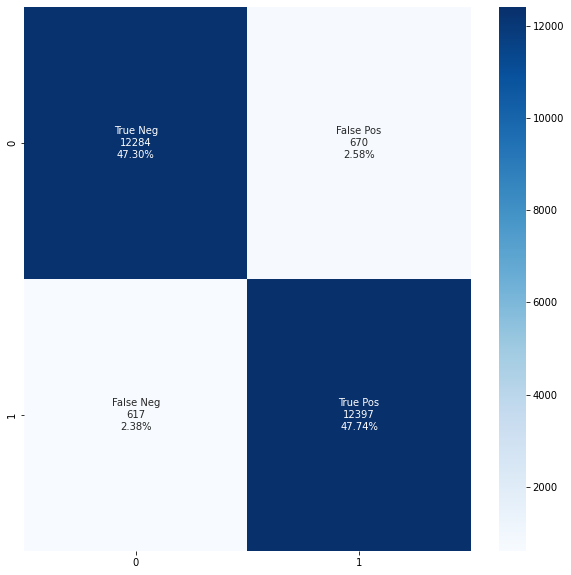

In [11]:
cm = metrics.confusion_matrix(y, np.where(valid_preds_array>=0.5, 1, 0))

plt.figure(figsize=(10, 10))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

In [12]:
sample.iloc[:, 1] = test_preds_array
sample.head()

,sequence,state
0,25968,0.991441
1,25969,0.991955
2,25970,0.007239
3,25971,0.988694
4,25972,0.188105


In [13]:
sample.to_csv('submission_lgbm.csv', index=False)